In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import dask.array as da
import seaborn as sns

In [17]:
#era5 data
ds_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/era5/2021.h5')
ds_era
ds_era5 = ds_era.fields[656:737:4,5,260:40:-1,720:1200]
np.shape(ds_era5)
ds_era5_1 = ds_era5[:,61:141,194:274]
np.shape(ds_era5_1)

mean_era5 = np.mean(ds_era5_1, axis=(1, 2))
mean_era5

mean_era5_06_29_850hpa = mean_era5[15]
%store mean_era5_06_29_850hpa

Stored 'mean_era5_06_29_850hpa' (DataArray)


In [18]:
%store -r mean_era5_06_29_850hpa

In [4]:
#data check
#another way to check the era5 data
ds_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/era5/2021.h5')
ds_era

#phony_dim_0: 1460(timestep); phony_dim_1: 20(variable); phony_dim_2: 721(longitude); phony_dim_3: 144(latitude)


#fcn-based on ECMWF initial conditions plots


ds_fcn_ecmwf = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210629_00_backtransformed.nc')
ds_fcn_ecmwf

ds_fcn_ecmwf.forecast[50,0,2,::-1,:]
ds_era.fields[709,2,260:40:-1,720:1200]

ds_ecmwf = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210614_00_pl.nc')
ds_ecmwf

lon_ec = ds_ecmwf['longitude']
lat_ec = ds_ecmwf['latitude']

#lat_ec

In [5]:
ds_fcn_ecmwf = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210629_00_backtransformed.nc')
ds_fcn_ecmwf

<xarray.Dataset>
Dimensions:      (phony_dim_2: 21, phony_dim_0: 51, phony_dim_1: 57,
                  phony_dim_3: 220, phony_dim_4: 480)
Coordinates:
  * phony_dim_2  (phony_dim_2) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 0
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 49 50 51 52 53 54 55 56
  * phony_dim_3  (phony_dim_3) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479
Data variables:
    forecast     (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3, phony_dim_4) float64 ...

In [6]:
#ds_fcn_ecmwf.forecast[:,1,2,:,:].values

In [7]:
ds_ecmwf = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210629_00_sfc.nc')
#ds_ecmwf.t2m[0,:,:,:].values

In [8]:
#ECMWF
directory = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/'
filename_pattern = r'fc_pf_\d{8}_\d{2}_pl\.nc'

files = sorted([f for f in os.listdir(directory) if re.match(filename_pattern, f)])
files

['fc_pf_20210614_00_pl.nc',
 'fc_pf_20210615_00_pl.nc',
 'fc_pf_20210616_00_pl.nc',
 'fc_pf_20210617_00_pl.nc',
 'fc_pf_20210618_00_pl.nc',
 'fc_pf_20210619_00_pl.nc',
 'fc_pf_20210620_00_pl.nc',
 'fc_pf_20210621_00_pl.nc',
 'fc_pf_20210622_00_pl.nc',
 'fc_pf_20210623_00_pl.nc',
 'fc_pf_20210624_00_pl.nc',
 'fc_pf_20210625_00_pl.nc',
 'fc_pf_20210626_00_pl.nc',
 'fc_pf_20210627_00_pl.nc',
 'fc_pf_20210628_00_pl.nc',
 'fc_pf_20210629_00_pl.nc',
 'fc_pf_20210630_00_pl.nc',
 'fc_pf_20210701_00_pl.nc',
 'fc_pf_20210702_00_pl.nc',
 'fc_pf_20210703_00_pl.nc',
 'fc_pf_20210704_00_pl.nc']

In [9]:
ds_1 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210614_00_pl.nc')
ds_1


<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 221, level: 4, number: 50, time: 57)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... -60.5 -60.25 -60.0
  * latitude   (latitude) float32 80.0 79.75 79.5 79.25 ... 25.5 25.25 25.0
  * level      (level) int32 1000 850 500 50
  * number     (number) int32 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * time       (time) datetime64[ns] 2021-06-14 ... 2021-06-28
Data variables:
    z          (time, number, level, latitude, longitude) float32 ...
    t          (time, number, level, latitude, longitude) float32 ...
    r          (time, number, level, latitude, longitude) float32 ...
    u          (time, number, level, latitude, longitude) float32 ...
    v          (time, number, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-30 13:09:47 GMT by grib_to_netcdf-2.18.0: grib_to_n...

In [10]:
data_ec_t850_1 = []


for file_1 in files[0:5]:
    file_path_1 = os.path.join(directory, file_1)
    ds_1 = xr.open_dataset(file_path_1)
    variable_data_1 = ds_1['t'][:,:,1,79:159,194:274]
    # Convert to dask array
    #variable_data = da.from_array(variable_data, chunks='auto')
    data_ec_t850_1.append(variable_data_1)

# Now, data_ec contains dask arrays

# You can perform computations on the dask arrays using dask functions
# For example, to compute the mean of the t2m variable across all files:
np.shape(data_ec_t850_1)

(5, 57, 50, 80, 80)

In [ ]:
%store data_ec_t850_1

In [12]:
data_ec_t850_2 = []


for file_2 in files[5:10]:
    file_path_2 = os.path.join(directory, file_2)
    ds_2 = xr.open_dataset(file_path_2)
    variable_data_2 = ds_2['t'][:,:,1,79:159,194:274]
    # Convert to dask array
    #variable_data = da.from_array(variable_data, chunks='auto')
    data_ec_t850_2.append(variable_data_2)

# Now, data_ec contains dask arrays

# You can perform computations on the dask arrays using dask functions
# For example, to compute the mean of the t2m variable across all files:
np.shape(data_ec_t850_2)
%store data_ec_t850_2

Stored 'data_ec_t850_2' (list)


In [13]:
data_ec_t850_3 = []


for file_3 in files[10:15]:
    file_path_3 = os.path.join(directory, file_3)
    ds_3 = xr.open_dataset(file_path_3)
    variable_data_3 = ds_3['t'][:,:,1,79:159,194:274]
    # Convert to dask array
    #variable_data = da.from_array(variable_data, chunks='auto')
    data_ec_t850_3.append(variable_data_3)

# Now, data_ec contains dask arrays

# You can perform computations on the dask arrays using dask functions
# For example, to compute the mean of the t2m variable across all files:
np.shape(data_ec_t850_3)
%store data_ec_t850_3

Stored 'data_ec_t850_3' (list)


In [14]:
data_ec_t850_4 = []


for file_4 in files[15:17]:
    file_path_4 = os.path.join(directory, file_4)
    ds_4 = xr.open_dataset(file_path_4)
    variable_data_4 = ds_4['t'][:,:,1,79:159,194:274]
    # Convert to dask array
    #variable_data = da.from_array(variable_data, chunks='auto')
    data_ec_t850_4.append(variable_data_4)

# Now, data_ec contains dask arrays

# You can perform computations on the dask arrays using dask functions
# For example, to compute the mean of the t2m variable across all files:
np.shape(data_ec_t850_4)
%store data_ec_t850_4

Stored 'data_ec_t850_4' (list)


In [15]:
%store -r data_ec_t850_1
%store -r data_ec_t850_2
%store -r data_ec_t850_3
%store -r data_ec_t850_4

In [16]:
data_ec_t850_1 =xr.DataArray(data_ec_t850_1)
data_ec_t850_2 =xr.DataArray(data_ec_t850_2)
data_ec_t850_3 =xr.DataArray(data_ec_t850_3)
data_ec_t850_4 =xr.DataArray(data_ec_t850_4)
mean_ecmwf_t850_1 = np.mean(data_ec_t850_1[:,:,:,:], axis=(-2, -1))
mean_ecmwf_t850_2 = np.mean(data_ec_t850_2[:,:,:,:], axis=(-2, -1))
mean_ecmwf_t850_3 = np.mean(data_ec_t850_3[:,:,:,:], axis=(-2, -1))
mean_ecmwf_t850_4 = np.mean(data_ec_t850_4[:,:,:,:], axis=(-2, -1))

In [17]:
mean_ecmwf_box = np.concatenate([mean_ecmwf_t850_1, mean_ecmwf_t850_2,mean_ecmwf_t850_3,mean_ecmwf_t850_4], axis=0)
np.shape(mean_ecmwf_box)

(17, 57, 50)

In [18]:
start_index = 56
step_size = 1
num_iterations =15
ec_values=[]
for i in range(num_iterations):
    ec_value = mean_ecmwf_box[(i+1) * step_size, start_index - i * step_size*4,:]
    ec_values.append(ec_value)
data_array_ec_values_t850 =xr.DataArray(ec_values)

np.shape(data_array_ec_values_t850)

(15, 50)

In [19]:
%store data_array_ec_values_t850

Stored 'data_array_ec_values_t850' (DataArray)


In [20]:
data_array_ec_values_t850[14,:]

<xarray.DataArray (dim_1: 50)>
array([299.4341 , 300.01843, 299.67972, 299.6606 , 299.52014, 299.95673,
       299.5213 , 299.68552, 299.27747, 299.77188, 299.6322 , 299.78455,
       299.41968, 299.77277, 299.8962 , 299.2959 , 299.2937 , 298.81296,
       300.09845, 299.772  , 298.54434, 299.6283 , 299.55212, 299.79608,
       299.38516, 299.93063, 299.82745, 299.61945, 299.67825, 298.78778,
       299.61172, 300.1189 , 299.61084, 299.26962, 299.4492 , 299.66068,
       299.70944, 299.17337, 299.75952, 299.35718, 299.8824 , 299.45526,
       299.83414, 298.7325 , 299.51196, 298.89487, 299.31992, 299.96967,
       299.90833, 299.75018], dtype=float32)
Dimensions without coordinates: dim_1

([<matplotlib.axis.XTick at 0x1462b88a0040>,
 [Text(1, 0, 'Jun 15'),
  Text(2, 0, 'Jun 16'),
  Text(3, 0, 'Jun 17'),
  Text(4, 0, 'Jun 18'),
  Text(5, 0, 'Jun 19'),
  Text(6, 0, 'Jun 20'),
  Text(7, 0, 'Jun 21'),
  Text(8, 0, 'Jun 22'),
  Text(9, 0, 'Jun 23'),
  Text(10, 0, 'Jun 24'),
  Text(11, 0, 'Jun 25'),
  Text(12, 0, 'Jun 26'),
  Text(13, 0, 'Jun 27'),
  Text(14, 0, 'Jun 28'),
  Text(15, 0, 'Jun 29')])

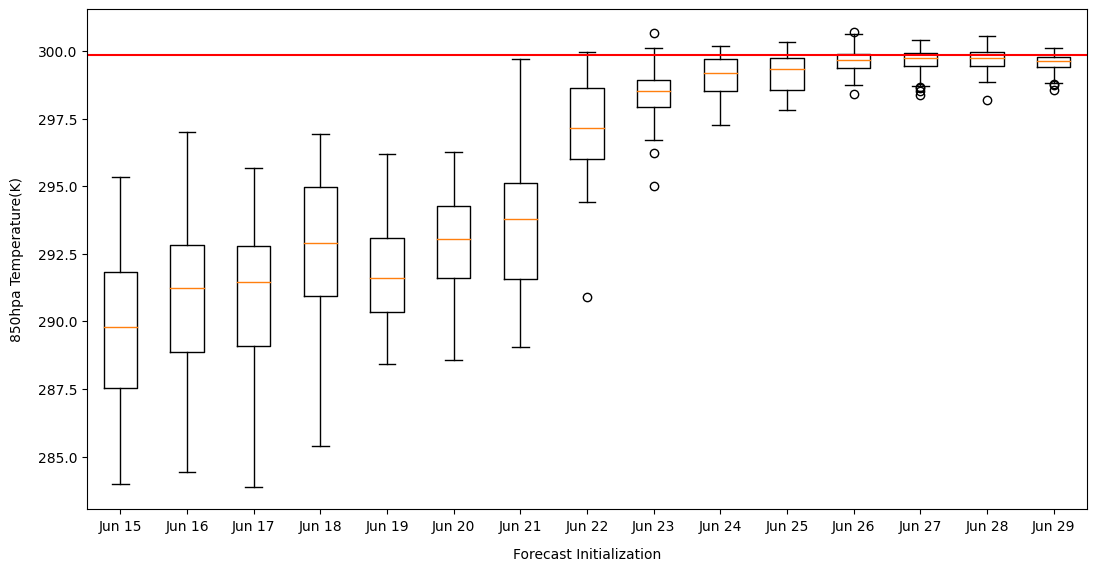

In [21]:


#boxplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("850hpa Temperature(K)", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
data=data_array_ec_values_t850.T
ax.boxplot(data)
ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

In [2]:
#fcn_ecmwf
directory_fcn_ec = '/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/'
filename_pattern_fcn_ec = r'\d{8}_00_backtransformed\.nc'
#fc_cf_20210615_00_sfc.nc
#20210704_00_backtransformed.nc
files_fcn_ec = sorted([f for f in os.listdir(directory_fcn_ec) if re.match(filename_pattern_fcn_ec, f)])
#files_fcn_ec

In [48]:
ds_fcn_21 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')
ds_fcn_21

<xarray.Dataset>
Dimensions:      (phony_dim_3: 21, phony_dim_0: 21, phony_dim_1: 51,
                  phony_dim_2: 57, phony_dim_4: 220, phony_dim_5: 480)
Coordinates:
  * phony_dim_3  (phony_dim_3) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 0
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 20
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
  * phony_dim_2  (phony_dim_2) int64 0 1 2 3 4 5 6 7 ... 49 50 51 52 53 54 55 56
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_5  (phony_dim_5) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479
Data variables:
    forecast     (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3, phony_dim_4, phony_dim_5) float64 ...

In [53]:
ds_fcn_ec_1 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210614_00_backtransformed.nc') 
ds_fcn_ec_1

<xarray.Dataset>
Dimensions:      (phony_dim_2: 21, phony_dim_0: 51, phony_dim_1: 57,
                  phony_dim_3: 220, phony_dim_4: 480)
Coordinates:
  * phony_dim_2  (phony_dim_2) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 0
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 49 50 51 52 53 54 55 56
  * phony_dim_3  (phony_dim_3) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479
Data variables:
    forecast     (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3, phony_dim_4) float64 ...

In [9]:
ds_ecmwf = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210629_00_pl.nc')
ds_ecmwf

<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 221, level: 4, number: 50, time: 57)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... -60.5 -60.25 -60.0
  * latitude   (latitude) float32 80.0 79.75 79.5 79.25 ... 25.5 25.25 25.0
  * level      (level) int32 1000 850 500 50
  * number     (number) int32 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * time       (time) datetime64[ns] 2021-06-29 ... 2021-07-13
Data variables:
    z          (time, number, level, latitude, longitude) float32 ...
    t          (time, number, level, latitude, longitude) float32 ...
    r          (time, number, level, latitude, longitude) float32 ...
    u          (time, number, level, latitude, longitude) float32 ...
    v          (time, number, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-31 00:06:57 GMT by grib_to_netcdf-2.18.0: grib_to_n...

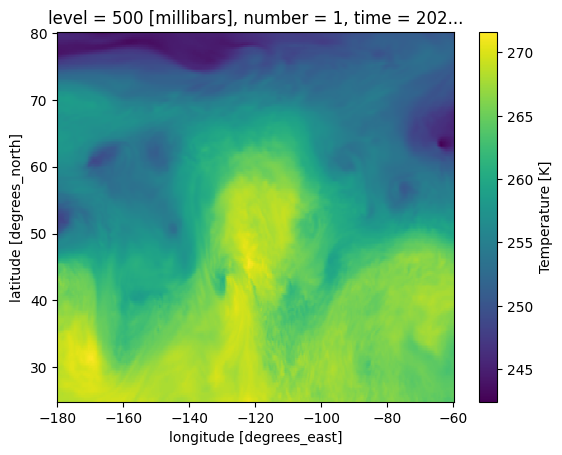

In [40]:
ds_ecmwf.isel(number = 0,time = 1,level = 2).t.plot()

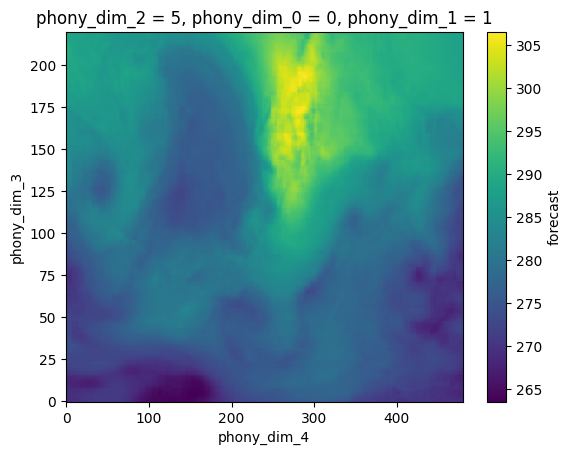

In [67]:
#phony_dim_2: 21phony_dim_0: 51phony_dim_1: 57phony_dim_3: 220phony_dim_4: 480
ds_fcn_ec_1.isel(phony_dim_0 = 0, phony_dim_1 = 1,phony_dim_2 =5).forecast.plot()

In [ ]:
#phony_dim_3: 21phony_dim_0: 21phony_dim_1: 51phony_dim_2: 57phony_dim_4: 220phony_dim_5: 480
ds_fcn_21.isel(phony_dim_0 = 0, phony_dim_1 = 0, phony_dim_2 = 0,phony_dim_3 = 5).forecast.plot()

In [4]:
#fcn_ecmwf
directory_fcn_ec = '/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/'
filename_pattern_fcn_ec = r'\d{8}_00_backtransformed\.nc'
#fc_cf_20210615_00_sfc.nc
#20210704_00_backtransformed.nc
files_fcn_ec = sorted([f for f in os.listdir(directory_fcn_ec) if re.match(filename_pattern_fcn_ec, f)])
#files_fcn_ec

ds_fcn_ec_1 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210614_00_backtransformed.nc') 
variable_data_fcn_ec_1 = ds_fcn_ec_1['forecast'][:,:,5,79:159,194:274]
mean_fcn_ec_850hpa_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

In [5]:
%store mean_fcn_ec_850hpa_1

Stored 'mean_fcn_ec_850hpa_1' (DataArray)


In [8]:
ds_fcn_ec_2 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210615_00_backtransformed.nc') 
variable_data_fcn_ec_2 = ds_fcn_ec_2['forecast'][:,:,5,79:159,194:274]

mean_fcn_ec_850hpa_2 = np.mean(variable_data_fcn_ec_2, axis=(-2, -1))
%store mean_fcn_ec_850hpa_2

Stored 'mean_fcn_ec_850hpa_2' (DataArray)


In [9]:
ds_fcn_ec_3= xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210616_00_backtransformed.nc') 
variable_data_fcn_ec_3 = ds_fcn_ec_3['forecast'][:,:,5,79:159,194:274]
mean_fcn_ec_850hpa_3 = np.mean(variable_data_fcn_ec_3, axis=(-2, -1))
%store mean_fcn_ec_850hpa_3

Stored 'mean_fcn_ec_850hpa_3' (DataArray)


In [10]:
ds_fcn_ec_4 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210617_00_backtransformed.nc') 
variable_data_fcn_ec_4 = ds_fcn_ec_4['forecast'][:,:,5,79:159,194:274]
mean_fcn_ec_850hpa_4 = np.mean(variable_data_fcn_ec_4, axis=(-2, -1))
%store mean_fcn_ec_850hpa_4

Stored 'mean_fcn_ec_850hpa_4' (DataArray)


In [12]:
ds_fcn_ec_5 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210618_00_backtransformed.nc') 
variable_data_fcn_ec_5 = ds_fcn_ec_5['forecast'][:,:,5,79:159,194:274]
mean_fcn_ec_850hpa_5 = np.mean(variable_data_fcn_ec_5, axis=(-2, -1))
%store mean_fcn_ec_850hpa_5

Stored 'mean_fcn_ec_850hpa_5' (DataArray)


In [3]:
ds_fcn_ec_6 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210619_00_backtransformed.nc') 
variable_data_fcn_ec_6 = ds_fcn_ec_6['forecast'][:,:,5,79:159,194:274]
mean_fcn_ec_850hpa_6 = np.mean(variable_data_fcn_ec_6, axis=(-2, -1))
%store mean_fcn_ec_850hpa_6

Stored 'mean_fcn_ec_850hpa_6' (DataArray)


In [14]:
ds_fcn_ec_7 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210620_00_backtransformed.nc') 
variable_data_fcn_ec_7 = ds_fcn_ec_7['forecast'][:,:,5,79:159,194:274]
mean_fcn_ec_850hpa_7 = np.mean(variable_data_fcn_ec_7, axis=(-2, -1))
%store mean_fcn_ec_850hpa_7

Stored 'mean_fcn_ec_850hpa_7' (DataArray)


In [15]:
ds_fcn_ec_8 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210621_00_backtransformed.nc') 
variable_data_fcn_ec_8 = ds_fcn_ec_8['forecast'][:,:,5,79:159,194:274]
mean_fcn_ec_850hpa_8 = np.mean(variable_data_fcn_ec_8, axis=(-2, -1))
%store mean_fcn_ec_850hpa_8

Stored 'mean_fcn_ec_850hpa_8' (DataArray)


In [ ]:
ds_fcn_ec_9 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210622_00_backtransformed.nc') 
variable_data_fcn_ec_9 = ds_fcn_ec_9['forecast'][:,:,5,79:159,194:274]
mean_fcn_ec_850hpa_9 = np.mean(variable_data_fcn_ec_9, axis=(-2, -1))
%store mean_fcn_ec_850hpa_9

Stored 'mean_fcn_ec_850hpa_9' (DataArray)


In [ ]:
ds_fcn_ec_10 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210623_00_backtransformed.nc') 
variable_data_fcn_ec_10 = ds_fcn_ec_10['forecast'][:,:,5,79:159,194:274]
mean_fcn_ec_850hpa_10 = np.mean(variable_data_fcn_ec_10, axis=(-2, -1))
%store mean_fcn_ec_850hpa_10

Stored 'mean_fcn_ec_850hpa_10' (DataArray)


In [18]:
ds_fcn_ec_11 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210624_00_backtransformed.nc') 
variable_data_fcn_ec_11 = ds_fcn_ec_11['forecast'][:,:,5,79:159,194:274]
mean_fcn_ec_850hpa_11 = np.mean(variable_data_fcn_ec_11, axis=(-2, -1))
%store mean_fcn_ec_850hpa_11

Stored 'mean_fcn_ec_850hpa_11' (DataArray)


In [19]:
ds_fcn_ec_12 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210625_00_backtransformed.nc') 
variable_data_fcn_ec_12 = ds_fcn_ec_12['forecast'][:,:,5,79:159,194:274]
mean_fcn_ec_850hpa_12 = np.mean(variable_data_fcn_ec_12, axis=(-2, -1))
%store mean_fcn_ec_850hpa_12

Stored 'mean_fcn_ec_850hpa_12' (DataArray)


In [20]:
ds_fcn_ec_13 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210626_00_backtransformed.nc') 
variable_data_fcn_ec_13 = ds_fcn_ec_13['forecast'][:,:,5,79:159,194:274]
mean_fcn_ec_850hpa_13 = np.mean(variable_data_fcn_ec_13, axis=(-2, -1))
%store mean_fcn_ec_850hpa_13

Stored 'mean_fcn_ec_850hpa_13' (DataArray)


In [4]:
ds_fcn_ec_14 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210627_00_backtransformed.nc') 
variable_data_fcn_ec_14 = ds_fcn_ec_14['forecast'][:,:,5,79:159,194:274]
mean_fcn_ec_850hpa_14 = np.mean(variable_data_fcn_ec_14, axis=(-2, -1))
%store mean_fcn_ec_850hpa_14

Stored 'mean_fcn_ec_850hpa_14' (DataArray)


In [22]:
ds_fcn_ec_15 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210628_00_backtransformed.nc') 
variable_data_fcn_ec_15 = ds_fcn_ec_15['forecast'][:,:,5,79:159,194:274]
mean_fcn_ec_850hpa_15 = np.mean(variable_data_fcn_ec_15, axis=(-2, -1))
%store mean_fcn_ec_850hpa_15

Stored 'mean_fcn_ec_850hpa_15' (DataArray)


In [5]:
ds_fcn_ec_16 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210629_00_backtransformed.nc') 
variable_data_fcn_ec_16 = ds_fcn_ec_16['forecast'][:,:,5,79:159,194:274]
mean_fcn_ec_850hpa_16 = np.mean(variable_data_fcn_ec_16, axis=(-2, -1))
%store mean_fcn_ec_850hpa_16

Stored 'mean_fcn_ec_850hpa_16' (DataArray)


In [4]:
%store -r mean_fcn_ec_850hpa_1
%store -r mean_fcn_ec_850hpa_2
%store -r mean_fcn_ec_850hpa_3
%store -r mean_fcn_ec_850hpa_4
%store -r mean_fcn_ec_850hpa_5
%store -r mean_fcn_ec_850hpa_6
%store -r mean_fcn_ec_850hpa_7
%store -r mean_fcn_ec_850hpa_8
%store -r mean_fcn_ec_850hpa_9
%store -r mean_fcn_ec_850hpa_10
%store -r mean_fcn_ec_850hpa_11
%store -r mean_fcn_ec_850hpa_12
%store -r mean_fcn_ec_850hpa_13
%store -r mean_fcn_ec_850hpa_14
%store -r mean_fcn_ec_850hpa_15
%store -r mean_fcn_ec_850hpa_16

no stored variable or alias mean_fcn_ec_850hpa_1
no stored variable or alias mean_fcn_ec_850hpa_2
no stored variable or alias mean_fcn_ec_850hpa_3
no stored variable or alias mean_fcn_ec_850hpa_4
no stored variable or alias mean_fcn_ec_850hpa_5
no stored variable or alias mean_fcn_ec_850hpa_7
no stored variable or alias mean_fcn_ec_850hpa_8
no stored variable or alias mean_fcn_ec_850hpa_9
no stored variable or alias mean_fcn_ec_850hpa_10
no stored variable or alias mean_fcn_ec_850hpa_11
no stored variable or alias mean_fcn_ec_850hpa_12
no stored variable or alias mean_fcn_ec_850hpa_13
no stored variable or alias mean_fcn_ec_850hpa_14
no stored variable or alias mean_fcn_ec_850hpa_15
no stored variable or alias mean_fcn_ec_850hpa_16


In [7]:
new_dimension = 'time'
mean_fcn_ec_850hpa_1_expanded = mean_fcn_ec_850hpa_1.expand_dims(**{new_dimension: [0]})
mean_fcn_ec_850hpa_2_expanded = mean_fcn_ec_850hpa_2.expand_dims(**{new_dimension: [1]})
mean_fcn_ec_850hpa_3_expanded = mean_fcn_ec_850hpa_3.expand_dims(**{new_dimension: [2]})
mean_fcn_ec_850hpa_4_expanded = mean_fcn_ec_850hpa_4.expand_dims(**{new_dimension: [3]})
mean_fcn_ec_850hpa_5_expanded = mean_fcn_ec_850hpa_5.expand_dims(**{new_dimension: [4]})
mean_fcn_ec_850hpa_6_expanded = mean_fcn_ec_850hpa_6.expand_dims(**{new_dimension: [5]})
mean_fcn_ec_850hpa_7_expanded = mean_fcn_ec_850hpa_7.expand_dims(**{new_dimension: [6]})
mean_fcn_ec_850hpa_8_expanded = mean_fcn_ec_850hpa_8.expand_dims(**{new_dimension: [7]})
mean_fcn_ec_850hpa_9_expanded = mean_fcn_ec_850hpa_9.expand_dims(**{new_dimension: [8]})
mean_fcn_ec_850hpa_10_expanded = mean_fcn_ec_850hpa_10.expand_dims(**{new_dimension:[9]})
mean_fcn_ec_850hpa_11_expanded = mean_fcn_ec_850hpa_11.expand_dims(**{new_dimension: [10]})
mean_fcn_ec_850hpa_12_expanded = mean_fcn_ec_850hpa_12.expand_dims(**{new_dimension: [11]})
mean_fcn_ec_850hpa_13_expanded = mean_fcn_ec_850hpa_13.expand_dims(**{new_dimension: [12]})
mean_fcn_ec_850hpa_14_expanded = mean_fcn_ec_850hpa_14.expand_dims(**{new_dimension: [13]})
mean_fcn_ec_850hpa_15_expanded = mean_fcn_ec_850hpa_15.expand_dims(**{new_dimension: [14]})
mean_fcn_ec_850hpa_16_expanded = mean_fcn_ec_850hpa_16.expand_dims(**{new_dimension: [15]})

In [9]:
mean_ds_fcn_ec_850hpa = xr.concat([mean_fcn_ec_850hpa_1_expanded,mean_fcn_ec_850hpa_2_expanded,
                        mean_fcn_ec_850hpa_3_expanded,mean_fcn_ec_850hpa_4_expanded,mean_fcn_ec_850hpa_5_expanded,
                        mean_fcn_ec_850hpa_6_expanded,mean_fcn_ec_850hpa_7_expanded,mean_fcn_ec_850hpa_8_expanded,
                        mean_fcn_ec_850hpa_9_expanded,mean_fcn_ec_850hpa_10_expanded,mean_fcn_ec_850hpa_11_expanded,
                        mean_fcn_ec_850hpa_12_expanded,mean_fcn_ec_850hpa_13_expanded,mean_fcn_ec_850hpa_14_expanded,mean_fcn_ec_850hpa_15_expanded,mean_fcn_ec_850hpa_16_expanded],dim=new_dimension)

In [3]:
%store -r mean_fcn_ec_850hpa_6
#correction here
new_dimension = 'time'
mean_fcn_ec_850hpa_6_expanded = mean_fcn_ec_850hpa_6.expand_dims(**{new_dimension: [5]})

In [12]:
mean_fcn_ec_850hpa_6[:,40]

<xarray.DataArray 'forecast' (phony_dim_0: 51)>
array([293.9290749 , 291.34261065, 295.21913924, 292.79902197,
       291.62492705, 294.50804358, 293.73486912, 291.2109016 ,
       291.36260238, 295.31468655, 293.98384626, 294.36247459,
       294.17419837, 291.07167965, 290.25848605, 293.1636769 ,
       289.97065879, 290.49004796, 294.13736332, 292.20615821,
       293.1476351 , 292.1596866 , 293.55932958, 292.15576515,
       291.43808556, 293.71166646, 292.79002712, 289.49847064,
       291.55530046, 291.25225842, 293.97601086, 292.42360736,
       287.94912263, 295.18587668, 294.56659473, 293.65767763,
       293.62439342, 293.34901491, 293.58817297, 294.75895603,
       294.61126277, 293.61638033, 293.01530365, 290.56340682,
       292.80671769, 292.22518376, 295.1461776 , 293.62821561,
       295.04142974, 292.30194503, 294.0447565 ])
Coordinates:
    phony_dim_2  int64 5
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
    phony_dim_1  int64 40

In [ ]:
start_index = 56
step_size = 1
num_iterations =15
fc_ec_values_850hpa=[]
for i in range(num_iterations):
    fc_ec_value_850hpa = mean_ds_fcn_ec_850hpa[(i+1) * step_size,:, start_index - i * step_size*4]
    fc_ec_values_850hpa.append(fc_ec_value_850hpa)
data_array_fc_ec_values_850hpa =xr.DataArray(fc_ec_values_850hpa)

In [4]:
%store -r data_array_fc_ec_values_850hpa

In [14]:
data_array_fc_ec_values_850hpa[4,:]= mean_fcn_ec_850hpa_6[:,40]

In [15]:
%store data_array_fc_ec_values_850hpa

Stored 'data_array_fc_ec_values_850hpa' (DataArray)


<xarray.DataArray (dim_1: 51)>
array([274.94800415, 274.94800415, 274.94800415, 274.94800415,
       274.94800415, 274.94800415, 274.94800415, 274.94800415,
       274.94800415, 274.94800415, 274.94800415, 274.94800415,
       274.94800415, 274.94800415, 274.94800415, 274.94800415,
       274.94800415, 274.94800415, 274.94800415, 274.94800415,
       274.94800415, 274.94800415, 274.94800415, 274.94800415,
       274.94800415, 274.94800415, 274.94800415, 274.94800415,
       274.94800415, 274.94800415, 274.94800415, 274.94800415,
       274.94800415, 274.94800415, 274.94800415, 274.94800415,
       274.94800415, 274.94800415, 274.94800415, 274.94800415,
       274.94800415, 274.94800415, 274.94800415, 274.94800415,
       274.94800415, 274.94800415, 274.94800415, 274.94800415,
       274.94800415, 274.94800415, 274.94800415])
Dimensions without coordinates: dim_1

([<matplotlib.axis.XTick at 0x146de5c0ac40>,
 [Text(1, 0, 'Jun 15'),
  Text(2, 0, 'Jun 16'),
  Text(3, 0, 'Jun 17'),
  Text(4, 0, 'Jun 18'),
  Text(5, 0, 'Jun 19'),
  Text(6, 0, 'Jun 20'),
  Text(7, 0, 'Jun 21'),
  Text(8, 0, 'Jun 22'),
  Text(9, 0, 'Jun 23'),
  Text(10, 0, 'Jun 24'),
  Text(11, 0, 'Jun 25'),
  Text(12, 0, 'Jun 26'),
  Text(13, 0, 'Jun 27'),
  Text(14, 0, 'Jun 28')])

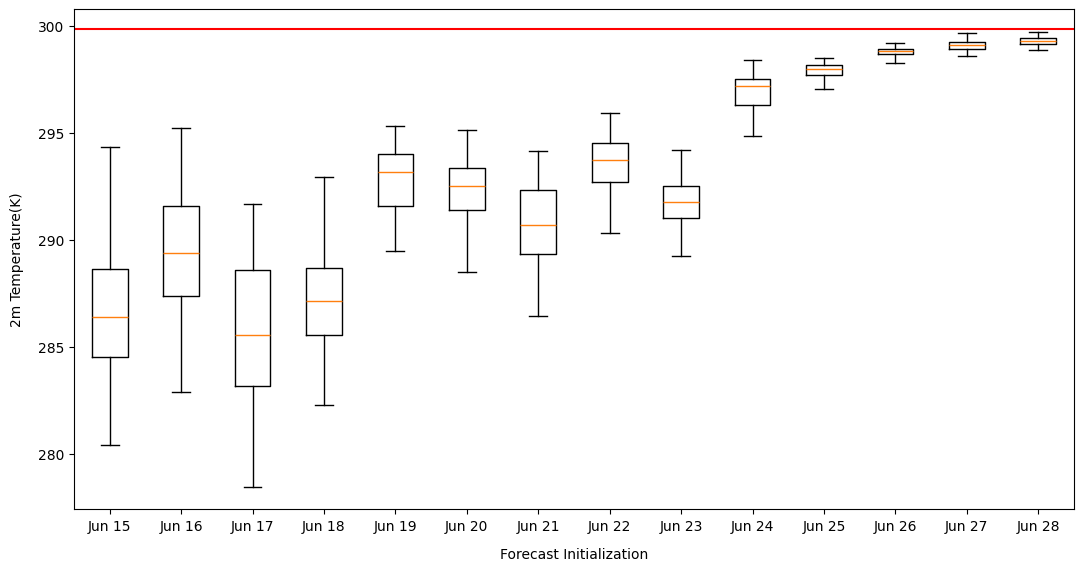

In [20]:
%store -r data_array_fc_ec_values_850hpa
#boxplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("2m Temperature(K)", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
#%store -r mean_era5_06_29
data=data_array_fc_ec_values_850hpa[0:14,:].T
ax.boxplot(data,showfliers = False)
ax.axhline(y=mean_era5_06_29_850hpa, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
              "Jun 28"])

In [3]:
ds_fcn_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')
ds_fcn_era

<xarray.Dataset>
Dimensions:      (phony_dim_3: 21, phony_dim_0: 21, phony_dim_1: 51,
                  phony_dim_2: 57, phony_dim_4: 220, phony_dim_5: 480)
Coordinates:
  * phony_dim_3  (phony_dim_3) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 0
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 20
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
  * phony_dim_2  (phony_dim_2) int64 0 1 2 3 4 5 6 7 ... 49 50 51 52 53 54 55 56
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_5  (phony_dim_5) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479
Data variables:
    forecast     (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3, phony_dim_4, phony_dim_5) float64 ...

In [4]:
variable_data_fcn_era_1 = ds_fcn_era['forecast'][0,:,:,5,79:159,194:274]
mean_fcn_850hpa_era_1 = np.mean(variable_data_fcn_era_1, axis=(-2, -1))
%store mean_fcn_850hpa_era_1

Stored 'mean_fcn_850hpa_era_1' (DataArray)


In [5]:
variable_data_fcn_era_2 = ds_fcn_era['forecast'][1,:,:,5,79:159,194:274]
mean_fcn_850hpa_era_2 = np.mean(variable_data_fcn_era_2, axis=(-2, -1))
%store mean_fcn_850hpa_era_2

Stored 'mean_fcn_850hpa_era_2' (DataArray)


In [6]:
variable_data_fcn_era_3 = ds_fcn_era['forecast'][2,:,:,5,79:159,194:274]
mean_fcn_850hpa_era_3 = np.mean(variable_data_fcn_era_3, axis=(-2, -1))
%store mean_fcn_850hpa_era_3

Stored 'mean_fcn_850hpa_era_3' (DataArray)


In [ ]:
variable_data_fcn_era_4 = ds_fcn_era['forecast'][3,:,:,5,79:159,194:274]
mean_fcn_850hpa_era_4 = np.mean(variable_data_fcn_era_4, axis=(-2, -1))
%store mean_fcn_850hpa_era_4

In [ ]:
variable_data_fcn_era_5 = ds_fcn_era['forecast'][4,:,:,5,79:159,194:274]
mean_fcn_850hpa_era_5 = np.mean(variable_data_fcn_era_5, axis=(-2, -1))
%store mean_fcn_850hpa_era_5

Stored 'mean_fcn_850hpa_era_5' (DataArray)


In [ ]:
variable_data_fcn_era_6 = ds_fcn_era['forecast'][5,:,:,5,79:159,194:274]
mean_fcn_850hpa_era_6 = np.mean(variable_data_fcn_era_6, axis=(-2, -1))
%store mean_fcn_850hpa_era_6

Stored 'mean_fcn_850hpa_era_6' (DataArray)


In [ ]:
variable_data_fcn_era_7 = ds_fcn_era['forecast'][6,:,:,5,79:159,194:274]
mean_fcn_850hpa_era_7 = np.mean(variable_data_fcn_era_7, axis=(-2, -1))
%store mean_fcn_850hpa_era_7

Stored 'mean_fcn_850hpa_era_7' (DataArray)


In [ ]:
variable_data_fcn_era_8 = ds_fcn_era['forecast'][7,:,:,5,79:159,194:274]
mean_fcn_850hpa_era_8 = np.mean(variable_data_fcn_era_8, axis=(-2, -1))
%store mean_fcn_850hpa_era_8

Stored 'mean_fcn_850hpa_era_8' (DataArray)


In [ ]:
variable_data_fcn_era_9 = ds_fcn_era['forecast'][8,:,:,5,79:159,194:274]
mean_fcn_850hpa_era_9 = np.mean(variable_data_fcn_era_9, axis=(-2, -1))
%store mean_fcn_850hpa_era_9

Stored 'mean_fcn_850hpa_era_9' (DataArray)


In [14]:
variable_data_fcn_era_10 = ds_fcn_era['forecast'][9,:,:,5,79:159,194:274]
mean_fcn_850hpa_era_10 = np.mean(variable_data_fcn_era_10, axis=(-2, -1))
%store mean_fcn_850hpa_era_10

Stored 'mean_fcn_850hpa_era_10' (DataArray)


In [15]:
variable_data_fcn_era_11 = ds_fcn_era['forecast'][10,:,:,5,79:159,194:274]
mean_fcn_850hpa_era_11 = np.mean(variable_data_fcn_era_11, axis=(-2, -1))
%store mean_fcn_850hpa_era_11

Stored 'mean_fcn_850hpa_era_11' (DataArray)


In [16]:
variable_data_fcn_era_12 = ds_fcn_era['forecast'][11,:,:,5,79:159,194:274]
mean_fcn_850hpa_era_12 = np.mean(variable_data_fcn_era_12, axis=(-2, -1))
%store mean_fcn_850hpa_era_12

Stored 'mean_fcn_850hpa_era_12' (DataArray)


In [ ]:
variable_data_fcn_era_13 = ds_fcn_era['forecast'][12,:,:,5,79:159,194:274]
mean_fcn_850hpa_era_13 = np.mean(variable_data_fcn_era_13, axis=(-2, -1))
%store mean_fcn_850hpa_era_13

In [ ]:
variable_data_fcn_era_14 = ds_fcn_era['forecast'][13,:,:,5,79:159,194:274]
mean_fcn_850hpa_era_14 = np.mean(variable_data_fcn_era_14, axis=(-2, -1))
%store mean_fcn_850hpa_era_14

Stored 'mean_fcn_850hpa_era_14' (DataArray)


In [4]:
variable_data_fcn_era_15 = ds_fcn_era['forecast'][14,:,:,5,79:159,194:274]
mean_fcn_850hpa_era_15 = np.mean(variable_data_fcn_era_15, axis=(-2, -1))
%store mean_fcn_850hpa_era_15

Stored 'mean_fcn_850hpa_era_15' (DataArray)


In [5]:
variable_data_fcn_era_16 = ds_fcn_era['forecast'][15,:,:,5,79:159,194:274]
mean_fcn_850hpa_era_16 = np.mean(variable_data_fcn_era_16, axis=(-2, -1))
%store mean_fcn_850hpa_era_16

Stored 'mean_fcn_850hpa_era_16' (DataArray)


In [7]:
%store -r mean_fcn_850hpa_era_1
%store -r mean_fcn_850hpa_era_2
%store -r mean_fcn_850hpa_era_3
%store -r mean_fcn_850hpa_era_4
%store -r mean_fcn_850hpa_era_5
%store -r mean_fcn_850hpa_era_6
%store -r mean_fcn_850hpa_era_7
%store -r mean_fcn_850hpa_era_8
%store -r mean_fcn_850hpa_era_9
%store -r mean_fcn_850hpa_era_10
%store -r mean_fcn_850hpa_era_11
%store -r mean_fcn_850hpa_era_12
%store -r mean_fcn_850hpa_era_13
%store -r mean_fcn_850hpa_era_14
%store -r mean_fcn_850hpa_era_15
%store -r mean_fcn_850hpa_era_16

In [8]:
new_dimension = 'time'
mean_fcn_850hpa_era_1_expanded = mean_fcn_850hpa_era_1.expand_dims(**{new_dimension: [0]})
mean_fcn_850hpa_era_2_expanded = mean_fcn_850hpa_era_2.expand_dims(**{new_dimension: [1]})
mean_fcn_850hpa_era_3_expanded = mean_fcn_850hpa_era_3.expand_dims(**{new_dimension: [2]})
mean_fcn_850hpa_era_4_expanded = mean_fcn_850hpa_era_4.expand_dims(**{new_dimension: [3]})
mean_fcn_850hpa_era_5_expanded = mean_fcn_850hpa_era_5.expand_dims(**{new_dimension: [4]})
mean_fcn_850hpa_era_6_expanded = mean_fcn_850hpa_era_6.expand_dims(**{new_dimension: [5]})
mean_fcn_850hpa_era_7_expanded = mean_fcn_850hpa_era_7.expand_dims(**{new_dimension: [6]})
mean_fcn_850hpa_era_8_expanded = mean_fcn_850hpa_era_8.expand_dims(**{new_dimension: [7]})
mean_fcn_850hpa_era_9_expanded = mean_fcn_850hpa_era_9.expand_dims(**{new_dimension: [8]})
mean_fcn_850hpa_era_10_expanded = mean_fcn_850hpa_era_10.expand_dims(**{new_dimension:[9]})
mean_fcn_850hpa_era_11_expanded = mean_fcn_850hpa_era_11.expand_dims(**{new_dimension: [10]})
mean_fcn_850hpa_era_12_expanded = mean_fcn_850hpa_era_12.expand_dims(**{new_dimension: [11]})
mean_fcn_850hpa_era_13_expanded = mean_fcn_850hpa_era_13.expand_dims(**{new_dimension: [12]})
mean_fcn_850hpa_era_14_expanded = mean_fcn_850hpa_era_14.expand_dims(**{new_dimension: [13]})
mean_fcn_850hpa_era_15_expanded = mean_fcn_850hpa_era_15.expand_dims(**{new_dimension: [14]})
mean_fcn_850hpa_era_16_expanded = mean_fcn_850hpa_era_16.expand_dims(**{new_dimension: [15]})

In [10]:
mean_ds_fcn_850hpa_era = xr.concat([mean_fcn_850hpa_era_1_expanded,mean_fcn_850hpa_era_2_expanded,
                        mean_fcn_850hpa_era_3_expanded,mean_fcn_850hpa_era_4_expanded,mean_fcn_850hpa_era_5_expanded,
                        mean_fcn_850hpa_era_6_expanded,mean_fcn_850hpa_era_7_expanded,mean_fcn_850hpa_era_8_expanded,
                        mean_fcn_850hpa_era_9_expanded,mean_fcn_850hpa_era_10_expanded,mean_fcn_850hpa_era_11_expanded,
                        mean_fcn_850hpa_era_12_expanded,mean_fcn_850hpa_era_13_expanded,mean_fcn_850hpa_era_14_expanded,mean_fcn_850hpa_era_15_expanded,mean_fcn_850hpa_era_16_expanded],dim=new_dimension)

In [13]:
start_index = 56
step_size = 1
num_iterations =15
fc_era_values=[]
for i in range(num_iterations):
    fc_era_value = mean_ds_fcn_850hpa_era[(i+1) * step_size,:, start_index - i * step_size*4]
    fc_era_values.append(fc_era_value)
data_array_fc_850hpa_era_values =xr.DataArray(fc_era_values)

%store data_array_fc_850hpa_era_values
%store -r data_array_fc_850hpa_era_values

Stored 'data_array_fc_850hpa_era_values' (DataArray)


{'whiskers': [<matplotlib.lines.Line2D at 0x1465992249a0>,
 'caps': [<matplotlib.lines.Line2D at 0x146599224dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x146599224730>,
 'medians': [<matplotlib.lines.Line2D at 0x1465991b5340>,
 'fliers': [],
 'means': []}

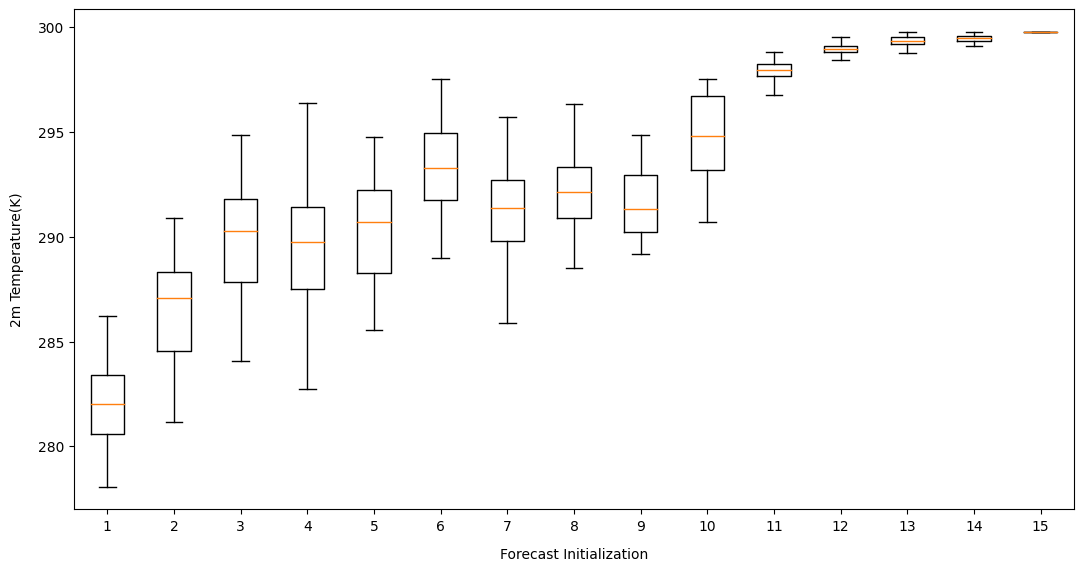

In [17]:
#boxplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("2m Temperature(K)", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
#%store -r mean_era5_06_29
data=data_array_fc_850hpa_era_values[:,:].T
ax.boxplot(data,showfliers=False)
#ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
#plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
          # ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
             #  "Jun 28", "Jun 29"])

In [19]:
import matplotlib.pyplot as pl
%store -r data_array_ec_values_t850
%store -r data_array_fc_850hpa_era_values
%store -r mean_era5_06_29_850hpa
%store -r data_array_fc_ec_values_850hpa

data_array_fc_ec_values_850hpa[14,1:51] = data_array_ec_values_t850[14,:]
#data_array_fc_ec_values_850hpa[:,15]

In [20]:
colors = [ 'lightblue','lightgreen']
                              

# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [data_array_ec_values_t850[:,:].T,data_array_fc_ec_values_850hpa[:,1:51].T]
np.shape(data_groups)

(2, 50, 15)

-0.5
0.5


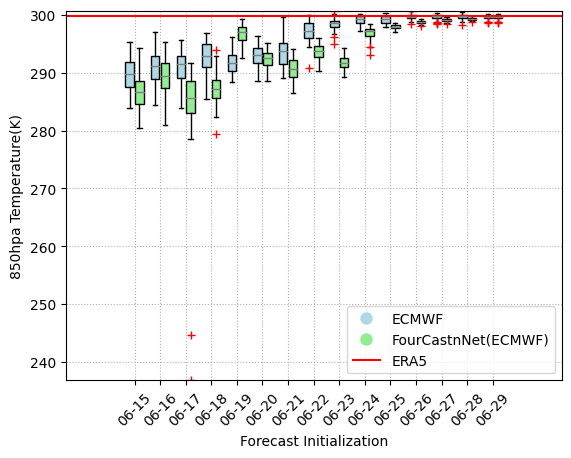

In [22]:
# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_array_ec_values_t850[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(ymin,ymax)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('850hpa Temperature(K)')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=True
                )
%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=mean_era5_06_29_850hpa, color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )




legend_labels = ['ECMWF','FourCastnNet(ECMWF)','ERA5']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:2], colors)] + line_artists
plt.legend(handles=legend_handles, loc='lower right')
plt.savefig('/home/kit/imk-tro/gj5173/21.09_boxplot/T850hpa_ts_ensemble_fcn-ec_ec.png', bbox_inches='tight',dpi=100)

pl.show()

In [15]:
import matplotlib.pyplot as pl
%store -r data_array_ec_values_t850
%store -r data_array_fc_850hpa_era_values
%store -r mean_era5_06_29_850hpa
colors = [ 'lightblue','lightpink']


# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [data_array_ec_values_t850[:,:].T,data_array_fc_850hpa_era_values[:,1:51].T]
np.shape(data_groups)

(2, 50, 15)

-0.5
0.5


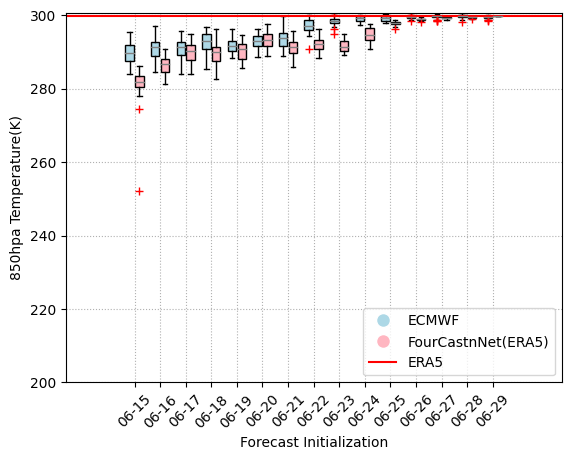

In [18]:
# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_array_ec_values_t850[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(200,ymax)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('850hpa Temperature(K)')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=True
                )
%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=mean_era5_06_29_850hpa, color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )




legend_labels = ['ECMWF','FourCastnNet(ERA5)','ERA5']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:2], colors)] + line_artists
plt.legend(handles=legend_handles, loc='lower right')
plt.savefig('/home/kit/imk-tro/gj5173/21.09_boxplot/850_ts_ensemble_ec_fcn_ERA5.png', bbox_inches='tight',dpi=100)

pl.show()

In [21]:

import matplotlib.pyplot as pl
%store -r data_array_ec_values_t850
%store -r data_array_fc_ec_values_850hpa
%store -r data_array_fc_850hpa_era_values

colors = [ 'lightblue','lightgreen','lightpink']


# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [data_array_ec_values_t850[:,:].T,data_array_fc_850hpa_era_values[:,1:51].T,data_array_fc_ec_values_850hpa[:,1:51].T]
np.shape(data_groups)

(3, 50, 15)

-1.0
0.0
1.0


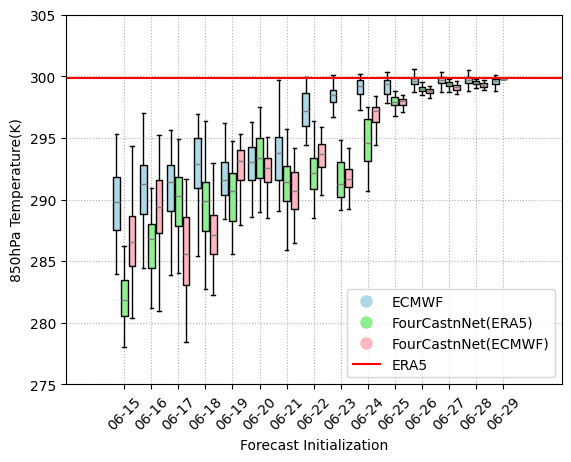

In [25]:
# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_array_fc_ec_values_850hpa[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(275,305)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('850hPa Temperature(K)')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=False
                )
%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=mean_era5_06_29_850hpa, color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )


legend_labels = ['ECMWF','FourCastnNet(ERA5)','FourCastnNet(ECMWF)']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:], colors) ]+ line_artists 
plt.legend(handles=legend_handles, loc='lower right')
plt.savefig('/home/kit/imk-tro/gj5173/10.10_plots/850_ts_ensemble_3togther_modified.png', bbox_inches='tight',dpi=100)

#pl.show()